# Signal is proportional to fraction folded

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../src')
from util import *
from config import * # where study is defined
import generate_dataset
import plots
import ipynbname

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## ∆T –  Does the Tm change with reaction Temp?

### Change in Temp (w/o prediction)
- For each A/C base in ROI, plot mutation fraction vs. T
    - should be linear for some portion, then level off when hydrolysis is faster than DMS reaction


In [4]:
%autoreload 2
for construct in study.df.construct.unique():
    df = plots.change_in_temp_mut_frac_vs_temperature(study, temperature_samples, construct)
    savefig2(ipynbname.path(), '[A] Change in temperature (w o prediction)/'+construct)
    if not generate_plots:
        break

No data: [], 3042-O-flank_1=hp1-DB


<Figure size 640x480 with 0 Axes>

### Mutation rate across the family vs pred ∆G (at 37 °C)
- Curve with Predicted ∆G
for each base in ROI, plot mutation fraction vs. pred ∆G (at 37 °C)
- fit each curve to ∆∆Goffset 


/Users/ymdt/src/dreem/dreem/draw/manipulator.py:77: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/Users/ymdt/src/dreem/dreem/draw/manipulator.py:77: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



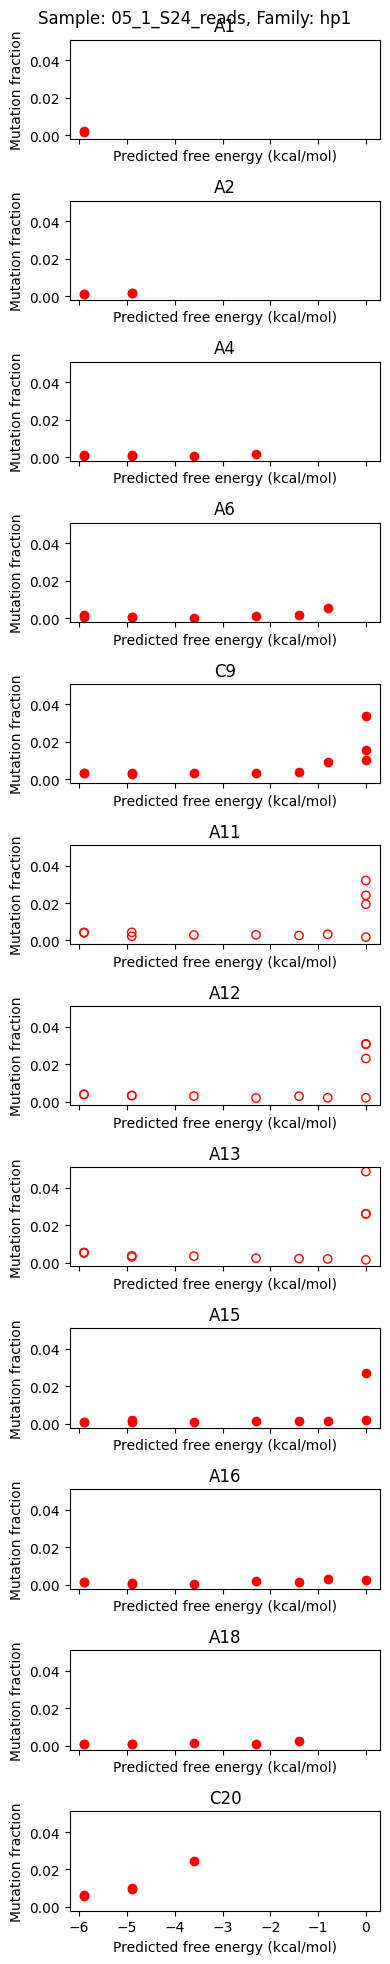

In [5]:
%reload_ext autoreload
for sample in study.df[study.df['temperature_k']==310]['sample'].unique():
    for family in study.get_df(sample=sample).family.unique():
        try:
            plots.mut_rate_across_family_vs_deltaG(study, sample, family)
            savefig2(ipynbname.path(), '[B] Change in temperature (w prediction at 37)/{}/{}'.format(sample, family))
        except:
            print('Error: sample={}, family={}'.format(sample, family))
        if not generate_plots:
            break
    if not generate_plots:
        break

### Change in Temp (w/ prediction at T) 
- For each base in ROI at each temp, plot mutation fraction vs. pred ∆G (at that temp) 
    - fit each curve to ∆∆Goffset
    - simple model—the offset should be the same if the algorithm is just off by some amount??


In [6]:
savefig2(ipynbname.path(), '[C] Change in temperature (w prediction at T)')

<Figure size 640x480 with 0 Axes>

##   ∆t – is the signal in the linear regime at the working reaction time? 
### Change in reaction time
- For each construct at each position, plot Mutation fraction vs. reaction time
    - scatter plot
    - fit linear region (for now that might just be to the first 3 points 1-5 min)--goodness of fit??




In [7]:
for construct in study.df.construct.unique():
    df = plots.change_in_reaction_time(study, samples=reaction_time_samples, construct=construct)
    savefig2(ipynbname.path(), '[D] Change in reaction time/'+construct)
    if not generate_plots:
        break

No data: ['Lauren_603_1min', 'Lauren_603_3min', 'Lauren_603_5min', 'Lauren_603_10min'], 3042-O-flank_1=hp1-DB


<Figure size 640x480 with 0 Axes>

## ∆[DMS] -  is the signal in the linear regime at the working concentration?
### Change in [DMS]
- For each construct at each position, plot Mutation fraction vs. [DMS]
    - fit linear region (for now that might just be to the first 3 points 0.5-1% DMS)--goodness of fit??


/Users/ymdt/src/dreem/dreem/draw/manipulator.py:77: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



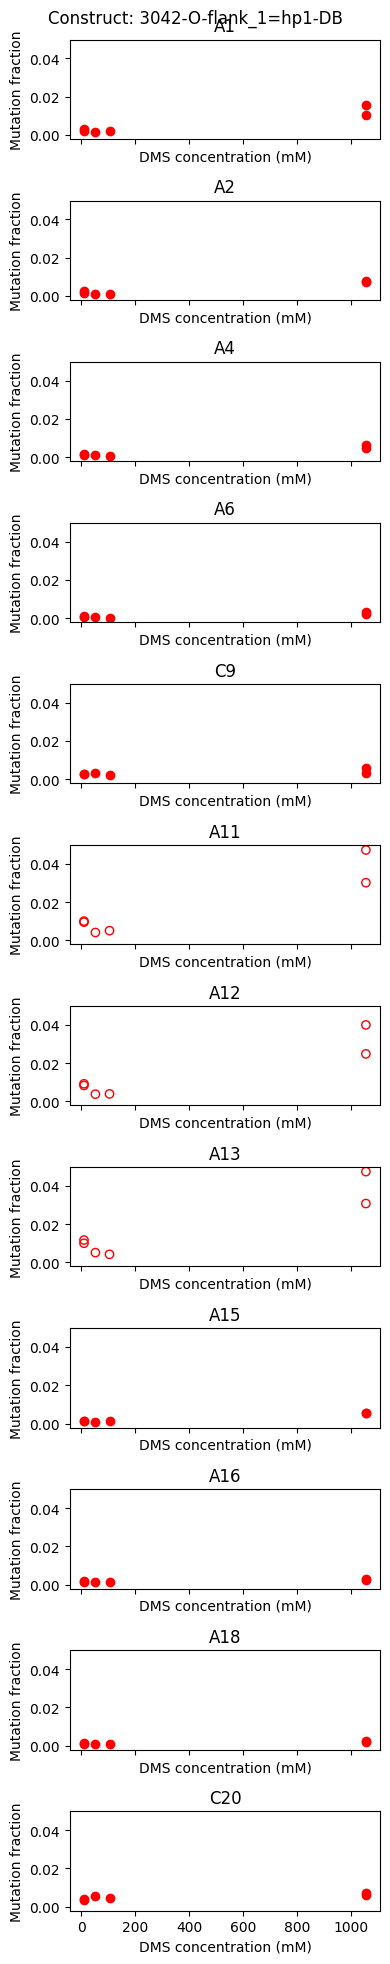

In [8]:
%reload_ext autoreload

for construct in study.df.construct.unique():
    df = plots.change_in_dms_conc(study, samples=dms_concentration_samples, construct=construct)
    savefig2(ipynbname.path(), '[E] Change in [DMS]/'+construct)
    if not generate_plots:
        break